### Objectives 
* Recap : Objectives of PCA
* Implement PCA using NumPy on IRIS data
* Implement PCA using scikit-learn on IRIS data
* Comparing both 
* Implement our own PCA class
* Introduction to LDA
* PCA vs LDA

### Objective of PCA 
* Finding the direction of maximum variance in high-dimensional dataset & project original data onto a smaller dimension subspace while retaining most important information.

### PCA Algorithm
* Doesn't consider class/target information 
* Standardize the dataset
* Obtain Eigenvectors & Eigenvalues from covariance matrix.
* Magnitude of the Eigenvetors is known as Eigenvalues.
* Eigenvectors or principal axes with heigher values means more important principal axes
* Sort the eginvectors based on eigenvalues. Choose n_components vectors 
* Generate projection matrix
* Use projection matrix to transform data


In [43]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = load_iris()

In [3]:
feature = iris.data

In [4]:
feature.shape

(150, 4)

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
target = iris.target

### 1. Standaradize the dataset

In [8]:
ss = StandardScaler()

In [9]:
feature_std = ss.fit_transform(feature)

### 2. Compute Eignvectors & Eginvalues of covariance matrix

* Conariance of matrix is calculated is how is one feature related to another fature

In [11]:
cov_mat = np.cov(feature_std.T)

In [12]:
cov_mat

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [13]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [14]:
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [15]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

### 3. Calculate a projection matrix
* This will be the matrix used to transform the iris data onto new feature subspace
* We want to take top two principal axes

In [16]:
matrix_w = eig_vecs[:,:2]

In [17]:
matrix_w

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

### 4. Transform data to new subspace

In [23]:
feature_pca = feature_std.dot(matrix_w)

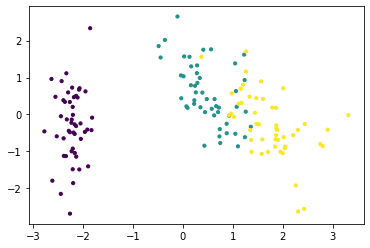

In [21]:
plt.scatter(feature_pca[:,0], feature_pca[:,1],c=target,s=10)

### 5. Validating sklearn

In [25]:
pca =PCA(n_components=2)

In [26]:
feature_skpca = pca.fit_transform(feature_std)

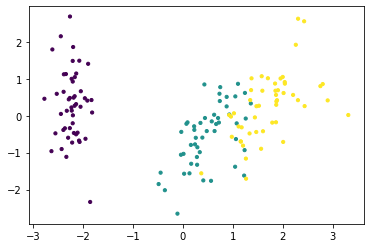

In [27]:
plt.scatter(feature_skpca[:,0], feature_skpca[:,1],c=target,s=10)

In [28]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [31]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

### 6. Implement PCA class

In [32]:
class MyPCA:
    
    def __init__(self,n_components=2):
        self.n_components = n_components
    
    def fit(self,feature):
        cov_mat = np.cov(feature.T)
        self.eig_vals, self.eig_vecs = np.linalg.eig(cov_mat)
        self.projection_matrix = self.eig_vecs[:,:self.n_components]
        
    def transform(self,feature):
        return feature.dot(self.projection_matrix)

In [33]:
mypca = MyPCA(n_components=2)

In [34]:
mypca.fit(feature_std)

In [35]:
mypca.transform(feature_std)[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

In [36]:
mypca.eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [37]:
feature_skpca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

### Introduction of LDA
* LDA (Linear Descriminant Analysis) also transforms the data but considers class information of the data

In [44]:
lda = LinearDiscriminantAnalysis(n_components = 2)

In [45]:
feature_lda = lda.fit_transform(feature_std, target)

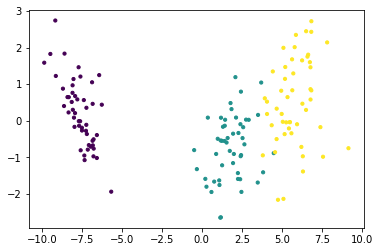

In [46]:
plt.scatter(feature_lda[:,0],feature_lda[:,1],c=target,s=10)

### Important Points
* Both PCA & LDA are linear transformation 
* LDA us supervised
* PCA is unsupervised
* LDA attends a subspace that maximizes class separability
* Number of components can be decided using GridSearch
* PCA's objective is denoising & dimensionality reduction
* LDA's objective is to make data ready for classifier

In [47]:
# spliting data 
trainX, testX, trainY, testY = train_test_split(feature_std, target)

In [48]:
pca_pipeline = make_pipeline(PCA(n_components=2),LogisticRegression())

In [50]:
lda_pipeline = make_pipeline(LinearDiscriminantAnalysis(n_components=2),LogisticRegression())

In [51]:
pca_pipeline.fit(trainX, trainY)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [52]:
lda_pipeline.fit(trainX, trainY)

Pipeline(steps=[('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [53]:
pca_pipeline.score(testX, testY)

0.9210526315789473

In [54]:
lda_pipeline.score(testX,testY)

1.0

* Obsevation : LDA is making data more aware for classification
* For very high dimensional dataset, PCA may start working well. So, check before concluding